In [7]:
import sys
sys.path.append('../')


import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import itertools
import os
from sklearn.metrics import classification_report
from src.utils import get_table_from_report

from dotenv import load_dotenv

load_dotenv()

RESULTS_PATH = os.getenv("RESULTS_PATH")


# compare the true results wwith the classying results

df = pd.read_csv("../results/annotations/CNCDH 2 - Annotation - data.csv")
df = df.fillna(0)
df = df.drop("text", axis=1)
df = df.replace('#', 0)
df[['antisémitisme', 'islamophobie', 'racisme']] = df[['antisémitisme', 'islamophobie', 'racisme']].astype(float)
df = df.replace(2, 1)



hate_type = ["antisémitisme", "islamophobie", "racisme"]
df["global hate"] = df[hate_type].max(axis=1)
df = df.replace("#", 0)

# get the one that are done with the rtask
df = df[df["annotateur"].isin(["Florian", "Charles", "Benjamin"])]

grouped = df.groupby("annotateur")["comment_id"].apply(list)
common_ids = list(set.intersection(*map(set, grouped)))

df_common = df[df["comment_id"].isin(common_ids)]
df_common = df_common.drop_duplicates().reset_index(drop=True)
df_class = df.drop('annotateur', axis=1).drop_duplicates().reset_index(drop=True)
df_class.columns = ['comment_id', 'true_antisémitisme', 'true_islamophobie', 'true_racisme', 'true_hate']


df_hate = pd.read_csv("../results/data_hate.csv", index_col = [0])
df_hate['pred_hate'] = 1

df_hate_unique = df_hate.pivot(index = 'comment_id', columns = 'type', values = 'pred_hate')

df_hate_anti = df_hate_unique[['antisémitisme']].dropna().reset_index()
df_hate_anti = df_hate_anti.rename(columns = {'antisémitisme':'pred_antisémitisme'})

df_hate_islam= df_hate_unique[['islamophobie']].dropna().reset_index()
df_hate_islam = df_hate_islam.rename(columns = {'islamophobie':'pred_islamophobie'})

df_hate_racisme= df_hate_unique[['racisme']].dropna().reset_index()
df_hate_racisme = df_hate_racisme.rename(columns = {'racisme':'pred_racisme'})

df_class_antisemitisme = pd.merge(df_class[['comment_id', 'true_antisémitisme']], df_hate_anti, on = 'comment_id', how = 'left')
df_class_antisemitisme = df_class_antisemitisme.fillna(0)
df_class_antisemitisme.columns = ['comment_id', 'true', 'pred']

df_class_islam = pd.merge(df_class[['comment_id', 'true_islamophobie']], df_hate_islam, on = 'comment_id', how = 'left')
df_class_islam = df_class_islam.fillna(0)
df_class_islam.columns = ['comment_id', 'true', 'pred']

df_class_racisme= pd.merge(df_class[['comment_id', 'true_racisme']], df_hate_racisme, on = 'comment_id', how = 'left')
df_class_racisme = df_class_racisme.fillna(0)
df_class_racisme.columns = ['comment_id', 'true', 'pred']

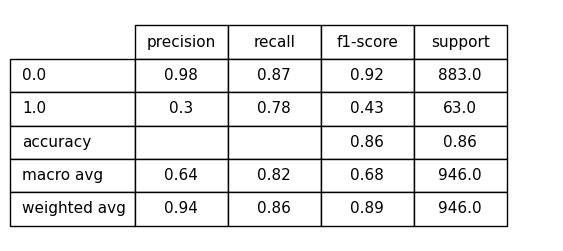

In [8]:
# Islam

pred_labels = list(df_class_islam['pred'])
true_labels = list(df_class_islam['true'])

report = classification_report(true_labels, pred_labels, output_dict = True)


df_report = get_table_from_report(report)

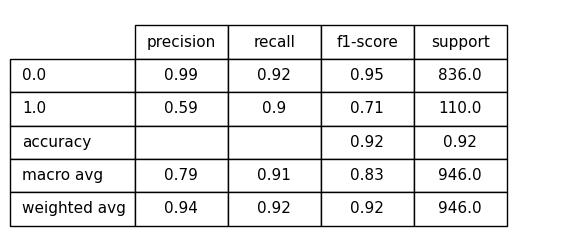

In [9]:
#Antisémistisme

pred_labels = list(df_class_antisemitisme['pred'])
true_labels = list(df_class_antisemitisme['true'])

report = classification_report(true_labels, pred_labels, output_dict = True)
df_report = get_table_from_report(report)

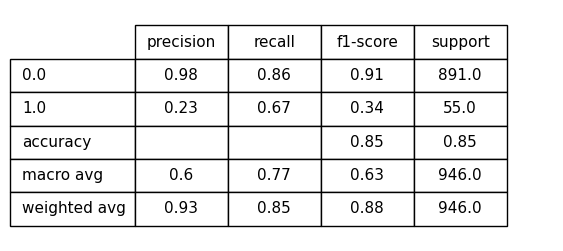

In [10]:
# racisme

pred_labels = list(df_class_racisme['pred'])
true_labels = list(df_class_racisme['true'])

report = classification_report(true_labels, pred_labels, output_dict = True)
df_report = get_table_from_report(report)

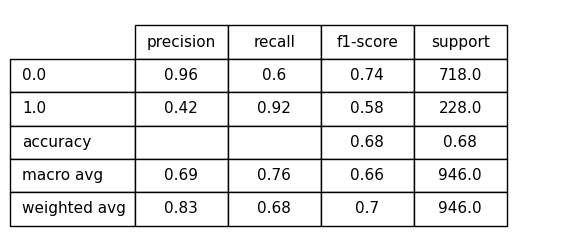

In [11]:
# Global

df_class_global = df_class[['comment_id','true_hate']]
df_hate_global = df_hate[['comment_id', 'pred_hate']]

df_class_hate = pd.merge(df_class_global, df_hate_global, on = 'comment_id', how = 'left')
df_class_hate = df_class_hate.fillna(0)
df_class_hate.columns = ['comment_id', 'true','pred']

pred_labels = list(df_class_hate['pred'])
true_labels = list(df_class_hate['true'])

report = classification_report(true_labels, pred_labels, output_dict = True)
df_report = get_table_from_report(report)